# Plotting with Matplotlib

---
## Load some EEG data to plot

!!! Note, how I extracted the eeg data below is not important, it just happens to be how it is arranged in the data file.

**What's important is that you can understand the arrangement of the eeg ndarray and manipulate it.**

In [2]:
from scipy.io import loadmat  # I'm using loadmat from the io submodule of the scipy module
data = loadmat('eeg.mat')  # load data saved in MATLAB format

# Grab relevant data into an ndarray with dimensions (channel, time, trial).
# Each channel is an electrode and each trial is a separate EEG recording from that electrode.
# So eeg is an ndarray where each row is a time series recording from a particular electrode channel
# and depth reflects repeated recordings from the same channel.
eeg = data["EEG"][0,0]["data"]  # [channel, time, trial]
time = data["EEG"][0,0]["times"][0]  # a 1d array of time points for the columns of eeg.

eeg.shape, time.shape

((64, 640, 99), (640,))

---
## Basic Plot

In [3]:
import matplotlib.pyplot as plt  # get pyplot from within the matplotlib module

In [ ]:
# Plot the EEG for the 1st trial in the 3rd channel.
plt.plot(time, eeg[2,:,0])
plt.xlabel("Time (ms)")
plt.ylabel("EEG ($\mu$V)")
plt.title("3rd Channel, 1st Trial");  # ; supresses text output !!!

## Figure Size

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(time, eeg[2,:,0])
plt.xlabel("Time (ms)")
plt.ylabel("EEG ($\mu$V)")
plt.title("3rd Channel, 1st Trial");

## Better Resolution for Retina Screens

<font color=red>Unfortunately, this won't work for non-retina screens :(</font>

In [ ]:
# Typically you would put this at the start of your notebook.
%config InlineBackend.figure_format = 'retina'

In [ ]:
plt.plot(time, eeg[2,:,0])
plt.xlabel("Time (ms)")
plt.ylabel("EEG ($\mu$V)")
plt.title("3rd Channel, 1st Trial");

## Plot Options

There are tons! e.g. see [Matplotlib's website](https://matplotlib.org). Here's a couple of examples:

In [ ]:
plt.plot(time, eeg[2,:,0], linewidth=0.75)
plt.xlabel("Time (ms)")
plt.ylabel("EEG ($\mu$V)")
plt.title("3rd Channel, 1st Trial");

In [ ]:
# Try these options:
# 1. dashed line
# 2. square markers
# 3. markers only
plt.plot(time[:10], eeg[2,:10,0], 'o-', linewidth=2, markersize=15)
plt.xlabel("Time (ms)")
plt.ylabel("EEG ($\mu$V)")
plt.title("3rd Channel, 1st Trial");

---
## Interactive Plots

If the below cells fail to run, try these steps:

1. Install `nodejs` and `ipympl` (version >= 0.4) module. Either via Anaconda navigator UI or in shell:
    * `conda install nodejs`
    * `conda install -c conda-forge ipympl`
2. Install Jupyter extensions. Run following commands in Terminal/Shell:
    * `conda update jupyterlab`
    * `jupyter labextension install @jupyter-widgets/jupyterlab-manager`
    * `jupyter labextension install jupyter-matplotlib`
    * `jupyter labextension update --all`
    * `jupyter lab build`
3. Restart JupyterLab

In [ ]:
# Typically you would put this at the start of your notebook.
# May require above installations to work.
%matplotlib widget

In [ ]:
plt.figure()
plt.plot(time, eeg[2,:,0])
plt.xlabel("Time (ms)")
plt.ylabel("EEG ($\mu$V)")
plt.title("3rd Channel, 1st Trial");

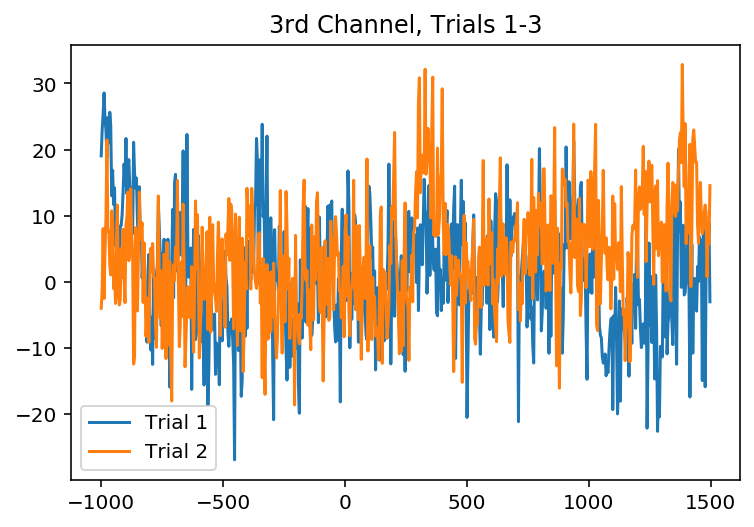

In [9]:
plt.plot(time, eeg[2,:,1]);
plt.plot(time, eeg[2,:,2]);
plt.title("3rd Channel, Trials 1-3")
plt.legend(["Trial 1", "Trial 2", "Trial 3"]);

In [ ]:
plt.cla()

In [ ]:
plt.plot(time, eeg[2,:,0])
plt.xlabel("Time (ms)")
plt.ylabel("EEG ($\mu$V)")
plt.title("3rd Channel, Trial 1");

In [ ]:
plt.figure()
plt.plot(time, eeg[2,:,:3], linewidth=.8)
plt.xlabel("Time (ms)")
plt.ylabel("EEG ($\mu$V)")
plt.title("3rd Channel, Trials 1-2")
plt.legend(["Trial 1", "Trial 2", "Trial 3"]);

---
## Plots in Separate Windows

You probably need the `pyqt` module:
* `conda install pyqt`

In [ ]:
# Need to restart the kernel to swithch to this instead of widget.
%matplotlib qt
import matplotlib.pyplot as plt

In [ ]:
# Since we restarted the kernel, we need to reload the EEG data.
from scipy.io import loadmat
data = loadmat('eeg.mat')  # load data saved in MATLAB format
eeg = data["EEG"][0,0]["data"]  # [channel, time, trial]
time = data["EEG"][0,0]["times"][0]  # a 1d array of time points for the columns of eeg.
eeg.shape, time.shape

In [ ]:
plt.figure()
plt.plot(time, eeg[2,:,:3], linewidth=1)
plt.xlabel("Time (ms)")
plt.ylabel("EEG ($\mu$V)")
plt.title("3rd Channel, Trials 1-2")
plt.legend(["Trial 1", "Trial 2", "Trial 3"]);

---
## Back to Inline Plots

In [1]:
# Switch back to non-interactive plots.
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(time, eeg[2,:,:3], linewidth=1)
plt.xlabel("Time (ms)")
plt.ylabel("EEG ($\mu$V)")
plt.title("3rd Channel, Trials 1-2")
plt.legend(["Trial 1", "Trial 2", "Trial 3"]);

---
## <font color=red>Exercises</font>

1. Plot the overlaid EEG records for the 50th trial in channels 1, 30 and 42.

2. Plot the average EEG across trials in channel 14.

3. Plot the average EEG across channels 1-10 for trial 82.

4. Plot the standard deviation across trials for the last channel.

---
## Array of Subplots

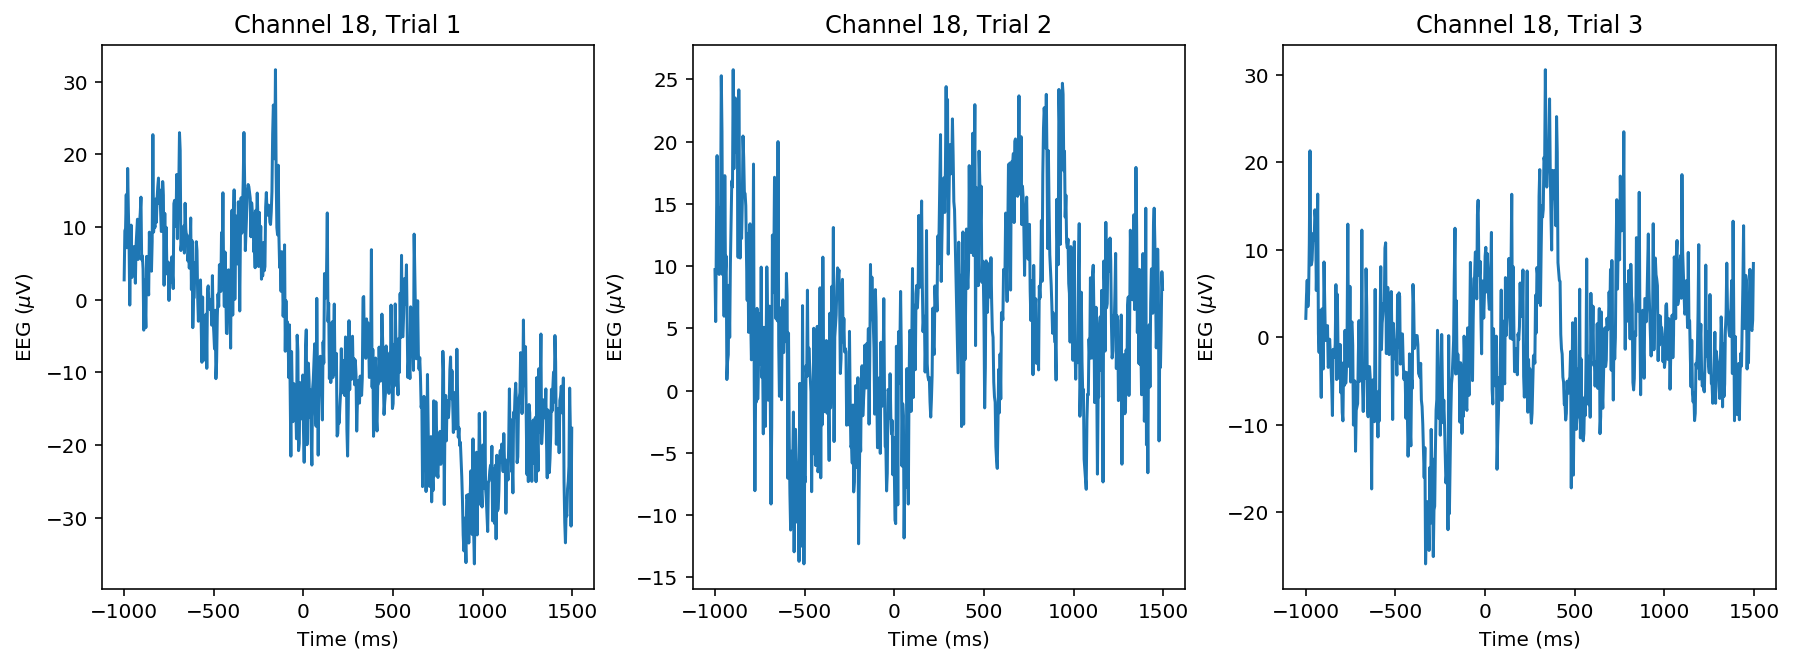

In [4]:
# We'll plot the first three trials in channel 18 in three separate plots arranged in a row.

fig = plt.figure(figsize=(15,5))

# 1st plot (row 1, column 1)
ax = fig.add_subplot(1, 3, 1)  # (rows, cols, index)  !!! Aaaargh, they're one-based indices !!!
ax.plot(time, eeg[18,:,0])
ax.set_xlabel("Time (ms)")
ax.set_ylabel("EEG ($\mu$V)")
ax.set_title("Channel 18, Trial 1")

# 2bd plot (row 1, column 2)
ax = fig.add_subplot(1, 3, 2)  # (rows, cols, index)  !!! Aaaargh, they're one-based indices !!!
ax.plot(time, eeg[18,:,1])
ax.set_xlabel("Time (ms)")
ax.set_ylabel("EEG ($\mu$V)")
ax.set_title("Channel 18, Trial 2")

# 3rd plot (row 1, column 3)
ax = fig.add_subplot(1, 3, 3)  # (rows, cols, index)  !!! Aaaargh, they're one-based indices !!!
ax.plot(time, eeg[18,:,2])
ax.set_xlabel("Time (ms)")
ax.set_ylabel("EEG ($\mu$V)")
ax.set_title("Channel 18, Trial 3");

---
## 3-D Plots

In [7]:
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d  # for 3d plots
%matplotlib widget

ModuleNotFoundError: No module named 'ipympl'

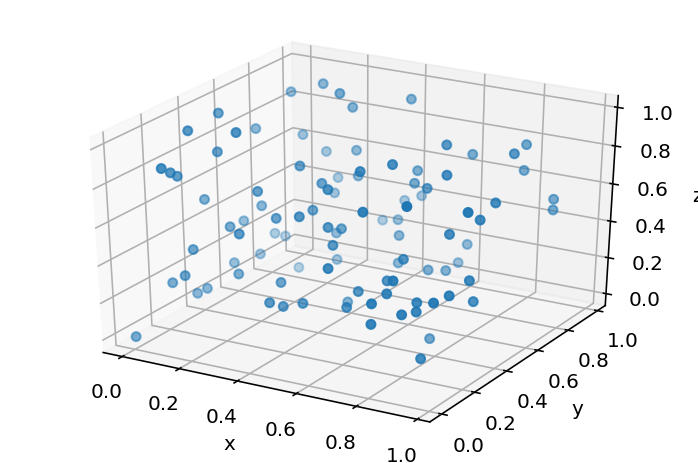

In [8]:
import numpy as np

xyz = np.random.random((100, 3))
x = xyz[:,0]
y = xyz[:,1]
z = xyz[:,2]

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection='3d')
ax.scatter(x, y, z)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');

#### <font color=red>Restart the kernel and then replot the above using an interactive plot.</font>

In [ ]:
# Switch back to non-interactive plots.
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [ ]:
# Since we restarted the kernel, we need to reload the EEG data.
from scipy.io import loadmat
data = loadmat('eeg.mat')  # load data saved in MATLAB format
eeg = data["EEG"][0,0]["data"]  # [channel, time, trial]
time = data["EEG"][0,0]["times"][0]  # a 1d array of time points for the columns of eeg.
eeg.shape, time.shape

In [ ]:
fig = plt.figure()
ax = fig.gca(projection='3d')
for i in range(10):
    ax.plot(time, eeg[0,:,i], i)
plt.xlabel("Time (ms)")
plt.ylabel("EEG ($\mu$V)")
ax.set_zlabel("Trial")

---
## Images

In [5]:
noisyImage = np.random.random((100,100))

plt.figure()
plt.imshow(noisyImage)
plt.colorbar();

NameError: name 'np' is not defined

---
## Seaborn

Some pre-configures and styled Matplotlib plots.

If you don't already have it, you'll need to install the seaborn module:

* `conda install seaborn`

In [ ]:
import seaborn as sns

In [ ]:
plt.figure()
sns.heatmap(noisyImage);